In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Reading the cleaned dataset

In [2]:
tweets_df_cleaned=pd.read_csv('cleaned_data.csv')

# Steps to Perform:
1. Split the data into training and testing sets.
2. Vectorize the text data using TF-IDF.
3. Fit a sentiment analysis model using a machine learning algorithm, such as logistic regression and random forest.

# Split the data into training and testing sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(tweets_df_cleaned['text'], tweets_df_cleaned['airline_sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF

In [4]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Fitting a sentiment analysis model using Random Forest

In [5]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

# Evaluate the model

In [6]:
# Predict for the test set
y_pred = rf_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy,'\n')
print(report)

0.7773224043715847 

              precision    recall  f1-score   support

    negative       0.79      0.95      0.86      1889
     neutral       0.64      0.40      0.49       580
    positive       0.81      0.54      0.65       459

    accuracy                           0.78      2928
   macro avg       0.75      0.63      0.67      2928
weighted avg       0.77      0.78      0.76      2928



# Visualize the confusion matrix

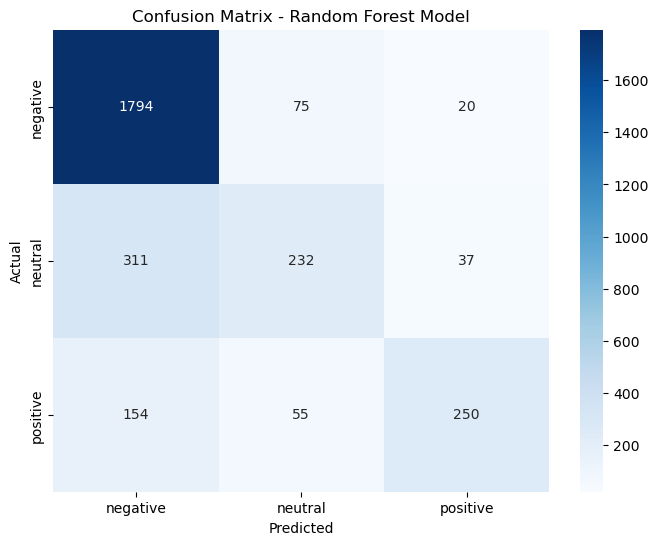

In [7]:
conf_matrix_lr = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Model')
plt.show()

# Fit a Logistic Regression

In [8]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, random_state=42)

# Evaluate the model

In [9]:
y_pred_lr = lr_model.predict(X_test_tfidf)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

print(accuracy_lr,'\n')
print(report_lr)

0.8022540983606558 

              precision    recall  f1-score   support

    negative       0.82      0.94      0.88      1889
     neutral       0.69      0.48      0.57       580
    positive       0.80      0.62      0.70       459

    accuracy                           0.80      2928
   macro avg       0.77      0.68      0.72      2928
weighted avg       0.79      0.80      0.79      2928



# Visualizing the confusion matrix for Logistic Regression

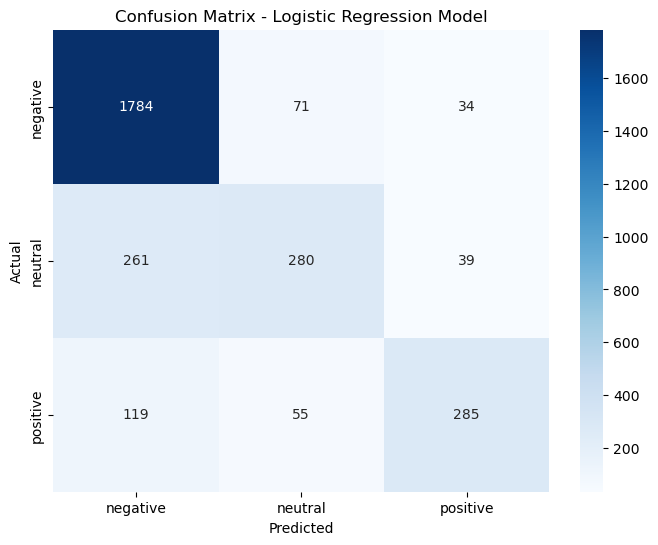

In [10]:
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression Model')
plt.show()

## Final Analysis:
The Logistic Regression model achieved an accuracy of approximately 80% on the test set, which is an improvement over the Random Forest model. The classification report provides detailed metrics for each sentiment class.